# Comparing models for classifying MNIST dataset

We use the famoys MNIST dataset to compare various classifiers

- Linear Classifier / Logistic Regression
- kNN Classification
- Neural Network
- Conolutional Neural Netwoek

## Load data and show a sample

In [1]:
import numpy as np 
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        



In [8]:
training_images_filepath= '/Volumes/DATA1/Datasets/MNIST/train-images-idx3-ubyte'
training_labels_filepath= '/Volumes/DATA1/Datasets/MNIST/train-labels-idx1-ubyte'
test_images_filepath= '/Volumes/DATA1/Datasets/MNIST/t10k-images-idx3-ubyte'
test_labels_filepath= '/Volumes/DATA1/Datasets/MNIST/t10k-labels-idx1-ubyte'

In [2]:
training_images_filepath= '/Users/matteo/Documents/GitHub/DataAnalysis/mnist/Data/train-images-idx3-ubyte'
training_labels_filepath= '/Users/matteo/Documents/GitHub/DataAnalysis/mnist/Data/train-labels-idx1-ubyte'
test_images_filepath= '/Users/matteo/Documents/GitHub/DataAnalysis/mnist/Data/t10k-images-idx3-ubyte'
test_labels_filepath= '/Users/matteo/Documents/GitHub/DataAnalysis/mnist/Data/t10k-labels-idx1-ubyte'

In [3]:
myClass = MnistDataloader(training_images_filepath,training_labels_filepath,test_images_filepath,test_labels_filepath)

In [4]:
(images_train,labels_train), (images_test,labels_test) = myClass.load_data()

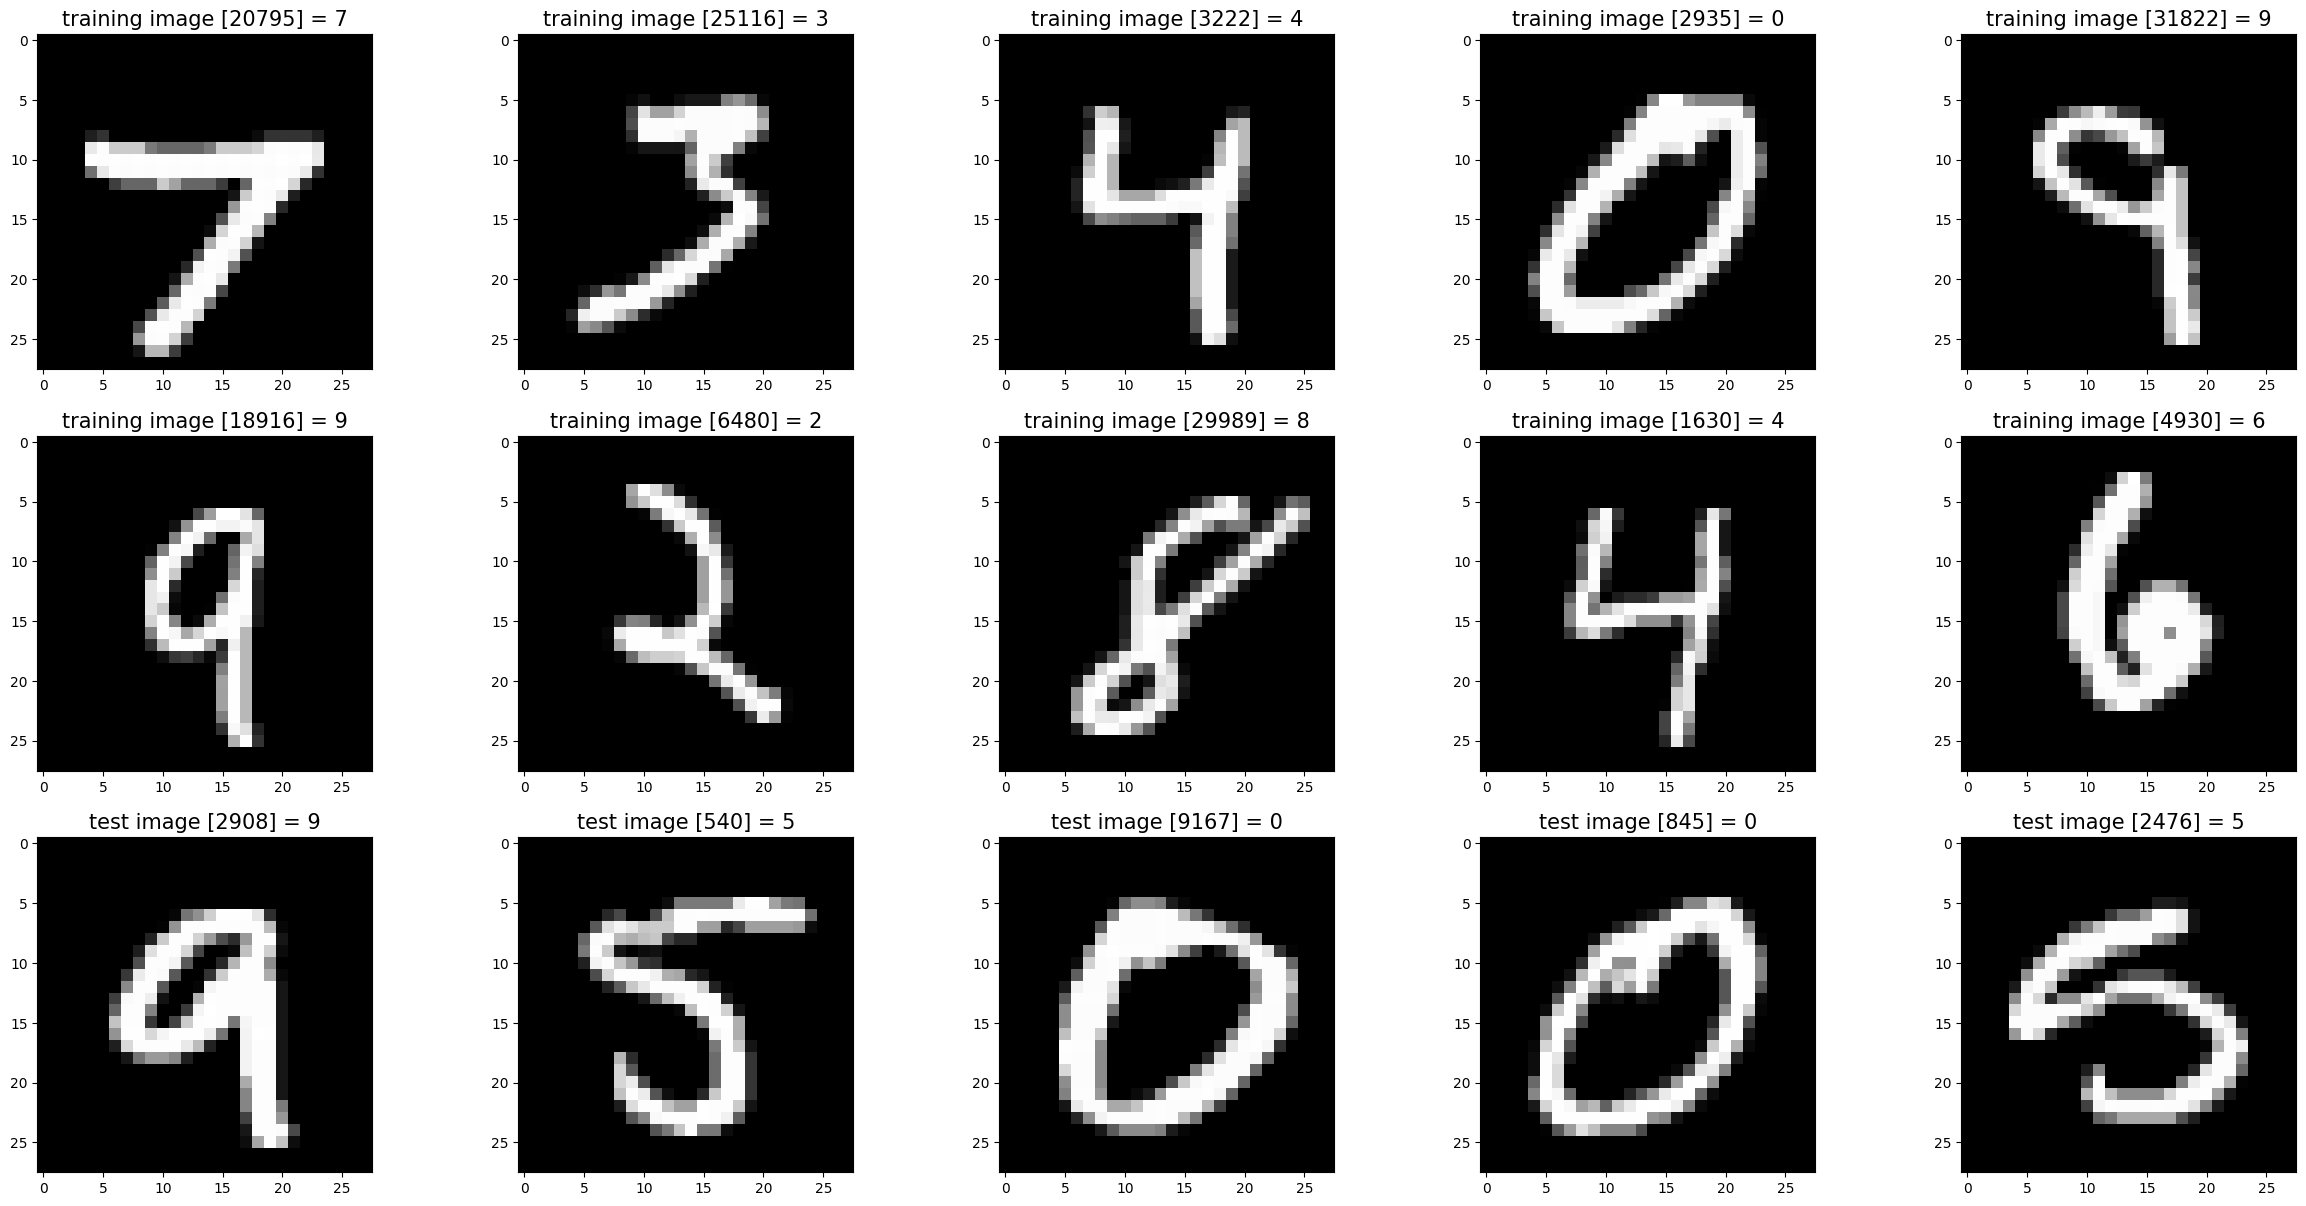

In [5]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(images_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(labels_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(images_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(labels_test[r]))    

show_images(images_2_show, titles_2_show)

In [6]:
len(images_test)

10000

In [ ]:
from sklearn.L import Logistic

## Define kNN Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Data preparation

In [8]:
#Flatten pixel array
images_train[0]
#x_train = np.array( [np.array(images_train) for i in range(len(images_train))] )

#pixels = x_data.flatten().reshape(1000, 12288)
#print(pixels.shape)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253,

In [9]:
X_train = np.array(images_train)

X_train = X_train.flatten().reshape(60000, 784)


X_test = np.array(images_test)
#Reshape test images
X_test = X_test.flatten().reshape(10000, 784)

### Run classifier

In [10]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:

# Train the classifier
knn.fit(X_train, labels_train)

#batch_size = 2000

# Iterate over batches and train the classifier
#for i in range(0, len(images_train), batch_size):
#    X_batch = images_train[i:i+batch_size]
#    y_batch = labels_train[i:i+batch_size]
#    
#    # Train the classifier on the current batch
#    knn.partial_fit(X_batch, y_batch)

#X_train.size

KNeighborsClassifier()

In [12]:
# Make predictions on the test set
labels_pred = knn.predict(X_test)

In [13]:
correct=0
for i, predicted_label in enumerate(labels_pred):
    if predicted_label == labels_test[i]:
        correct+=1
print(correct)

error_rate = ((10000-correct)/10000)*100

9688


In [14]:
# Evaluate the classifier
accuracy = metrics.accuracy_score(labels_test, labels_pred)
print("Accuracy is:", accuracy)

Accuracy is: 0.9688


In [15]:
print(f"Error rate is: {error_rate:.3f}%")

Error rate is: 3.120%


## Study kNN Classifier in terms of neighbors

In [16]:
error_rates = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, labels_train)
    labels_pred = knn.predict(X_test)

    correct=0
    for i, predicted_label in enumerate(labels_pred):
        if predicted_label == labels_test[i]:
            correct+=1
    error_rate = ((10000-correct)/10000)*100

    error_rates.append(error_rate)

Text(0, 0.5, 'Error Rate %')

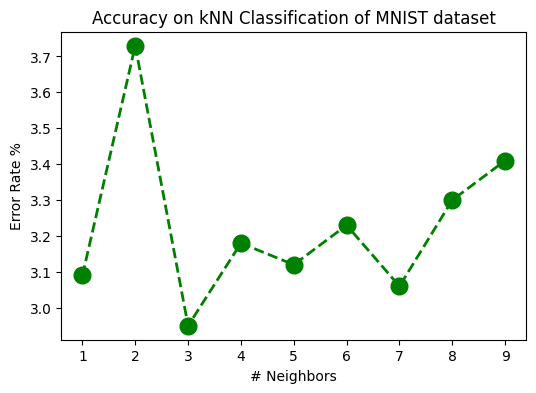

In [36]:
neighbors = [1,2,3,4,5,6,7,8,9]


fig, ax = plt.subplots(figsize=(6,4))

ax.plot(neighbors, error_rates, 'go--', linewidth=2, markersize=12)
ax.set_title('Accuracy on kNN Classification of MNIST dataset')
ax.set_xlabel('# Neighbors')
ax.set_ylabel('Error Rate %')

#plot(x, y, color='green', marker='o', linestyle='dashed',
    # linewidth=2, markersize=12)

## Basic neural network

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
#import torch.

In [ ]:
class NNModel(nn.Module):
    def __init__(self):

        #def layers
        self.x = x
        self.fc1
        self.fc2
        self.output
        
    def forward(self,x):
        pass

In [ ]:
#loss = torch. # CrossEntropyLoss
optim.Adam


## Convolutionalneural network